<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/03_Computer_Vision_CNN_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Required Libraries

In [90]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#DATA PREP

##Getting and Downloading Data

In [91]:
#For rhis lession we will be working with the FahionMNIST data set.
#This is the train data, to get test we just change train to False
train_data = datasets.FashionMNIST(
    root= "data",
    train= True,
    transform= ToTensor(),
    download= True,
    target_transform= None
)

#Now testing Data
test_data = datasets.FashionMNIST(
    root= "data",
    download= True,
    train=False,
    transform= ToTensor(),
    target_transform=None
)

In [92]:
len(train_data), len(test_data)

(60000, 10000)

In [126]:
image, label = train_data[1]
label

0

In [127]:
class_names = train_data.classes #This is a List of the classes in the dataset
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [95]:
class_to_index = train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

##Visualitizing Our data

Text(0.5, 1.0, 'Sneaker')

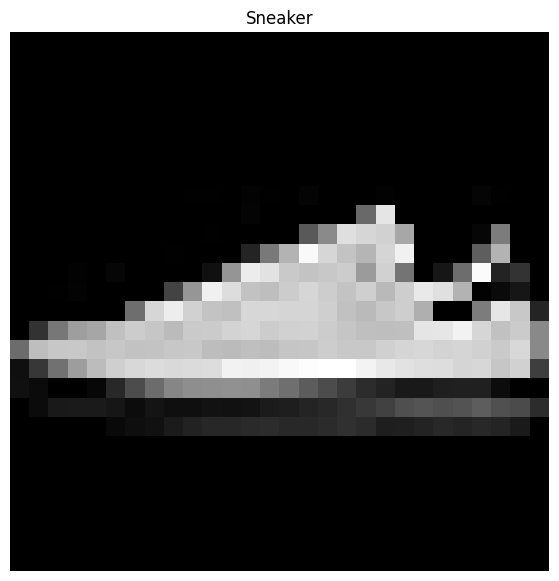

In [96]:
#This will output an IMAGE from out dataset at the index position given
plt.figure(figsize=(10,7))
plt.imshow(image.squeeze(), cmap = "gray")
plt.axis(False)
plt.title(class_names[label])

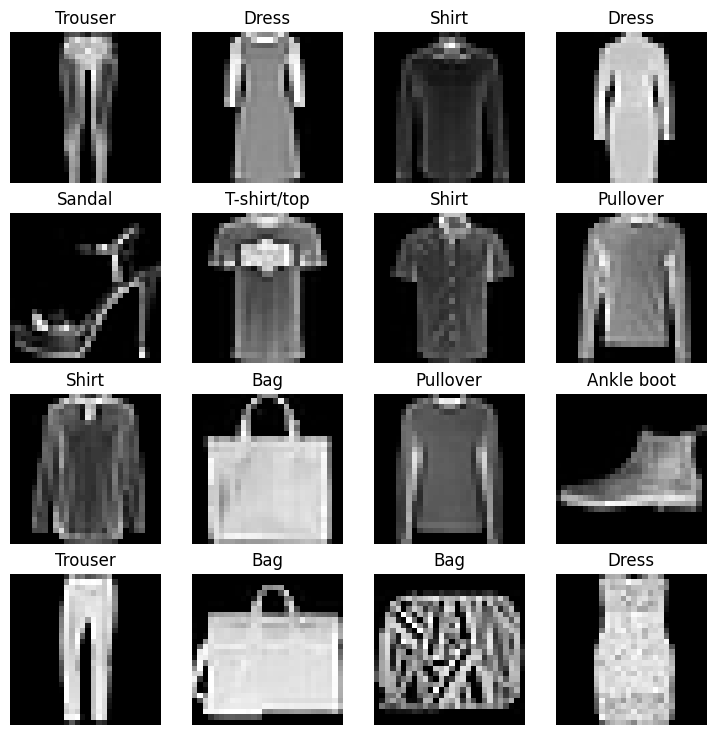

In [97]:
#Now lets make a for loop that generates images at random
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols +1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  image_1, label_1 = train_data[random_index]
  fig.add_subplot(rows,cols,i)   #adds to the plt
  plt.imshow(image_1.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(class_names[label_1])

##Loading Our Dataset

In [98]:
train_dataloader = DataLoader(
    dataset= train_data,
    batch_size=32,
    shuffle= True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size= 32,
    shuffle= False
)

In [110]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
len(train_features_batch), train_labels_batch.shape

(32, torch.Size([32]))

In [117]:
random_idx = torch.randint(0, len(train_features_batch), size= [1]).item()
image_2, label_2 = train_features_batch[random_idx], train_labels_batch[random_idx]
print(random_idx)

29


Text(0.5, 1.0, 'Coat')

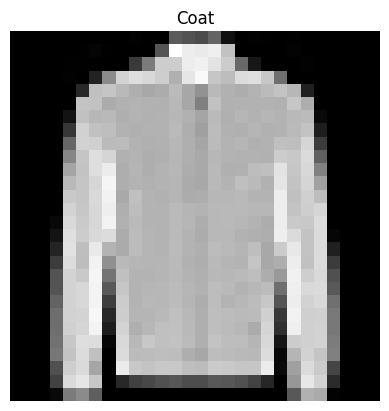

In [108]:
plt.imshow(image_2.squeeze(), cmap="gray")
plt.axis(False)
plt.title(class_names[label_2])

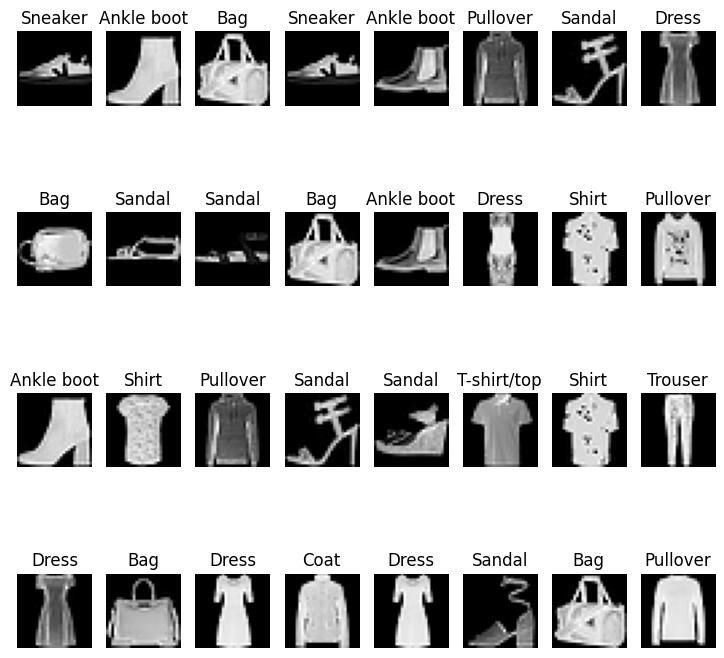

In [129]:
def visualize_batches(batch_size, train_features_batch=train_features_batch, train_labels_batch=train_labels_batch):
  fig = plt.figure(figsize=(9,9))
  row, col = int(batch_size/8), int(batch_size/4)

  for i in range(1, row*col+1):
    rand_int = torch.randint(0, len(train_features_batch), size=[1]).item()
    img, lab = train_features_batch[rand_int], train_labels_batch[rand_int]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)
    plt.title(class_names[lab])

visualize_batches(32)